<a href="https://colab.research.google.com/github/siennahan123/ITAndBusinessInovation/blob/main/1910328%20%ED%95%9C%EC%84%9C%EC%98%81%20%EC%8B%9C%EA%B0%81%ED%99%94%20%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#시작하기

### 셋업

In [ ]:
# set up the notebook for plotting and import the packages 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-whitegrid')
import seaborn as sns
import folium
import pandas as pd
import numpy as np
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

### 데이터 가져오기

In [ ]:
from pandas.core.groupby.grouper import DataFrame
health_data = "/content/drive/MyDrive/Colab Notebooks/health_data.csv"
health_df = pd.read_csv(health_data)

print(type(health_df))
display(health_df)

<class 'pandas.core.frame.DataFrame'>


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


# 전처리 및 탐색

In [ ]:
#데이터 타입 확인
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [ ]:
#가입자일련번호, 시도코드 문자열로 변경
health_df['가입자일련번호'] = health_df['가입자일련번호'].astype(str)
health_df['시도코드'] = health_df['시도코드'].astype(str) 

In [ ]:
#흡연상태, 음주여부는 No, NotNow, Yes를 각각 0, 1, 2로 변환
health_df['흡연상태'] = health_df['흡연상태'].astype(str)
health_df['음주여부'] = health_df['음주여부'].astype(str)

def strToNo(data):
  data
  if data == "No":
    data = 0
    return data
  elif data == "NotNow":
    data = 1
    return data
  else:
    data = 2
    return data

health_df["흡연상태"] = health_df["흡연상태"].apply(strToNo)
health_df["음주여부"] = health_df["음주여부"].apply(strToNo)


In [ ]:
#요약 통계량
health_df.describe()

,기준년도,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9912.000000,...,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,10000.00000,10000.000000,3251.000000,3251.000000
mean,2020.0,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,124.669693,...,1.119461,0.848484,27.58979,26.789851,38.098668,0.561200,1.16400,0.325100,0.175331,0.579514
std,0.0,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,14.629865,...,0.489782,0.301012,17.88442,23.735687,58.184579,0.784166,0.98651,0.468436,0.380308,0.591269
min,2020.0,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2020.0,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,...,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2020.0,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,...,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,2.00000,0.000000,0.000000,1.000000
75%,2020.0,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,134.000000,...,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,2.00000,1.000000,0.000000,1.000000
max,2020.0,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,200.000000,...,6.000000,9.200000,692.00000,1146.000000,2322.000000,2.000000,2.00000,1.000000,1.000000,2.000000


# 시각화

### 1. LDL 콜레스테롤 & 허리둘레 산점도

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53084 missing from current font.
  font.set_

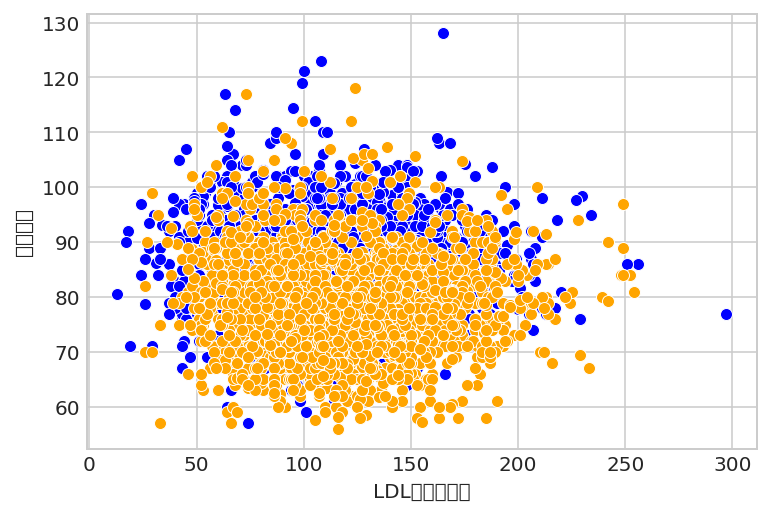

In [ ]:
# X=콜레스테롤, Y=허리둘레로, 콜레스테롤과 허리둘레 간의 상관관계에 대해 알아보기 위한 산점도 
sns.set_style("whitegrid")

cholesterol = health_df.dropna(subset = ["LDL콜레스테롤"], axis = 0) #콜레스테롤 결측치 제거
f_chol = cholesterol[cholesterol.성별코드 != 'M'] #콜레스테롤 결측치를 제거한 데이터에서 여성만을 따로 지정
m_chol = cholesterol[cholesterol.성별코드 != 'F'] #콜레스테롤 결측치를 제거한 데이터에서 남성만을 따로 지정

sns.scatterplot(data = m_chol, x = "LDL콜레스테롤", y = "허리둘레", c=['blue'])
sns.scatterplot(data = f_chol, x = "LDL콜레스테롤", y = "허리둘레", c=['orange'])

In [ ]:
# 여성이 주황색, 남성이 푸른색인데, 여성의 허리둘레가 남성보다 작다는 것을 (Y값) 한눈에 볼 수 있었다
# 흔히 나쁜 콜레스테롤이라고 하는 LDL 콜레스테롤이 눈에 보이는 비만에 직접적인 영향을 줄까 궁금하여 산점도를 시각해보았으나
# 허리둘레와 콜레스테롤 사이 일정 관계가 보이지 않았다.

### 2. 지역별 청력 차이

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_te

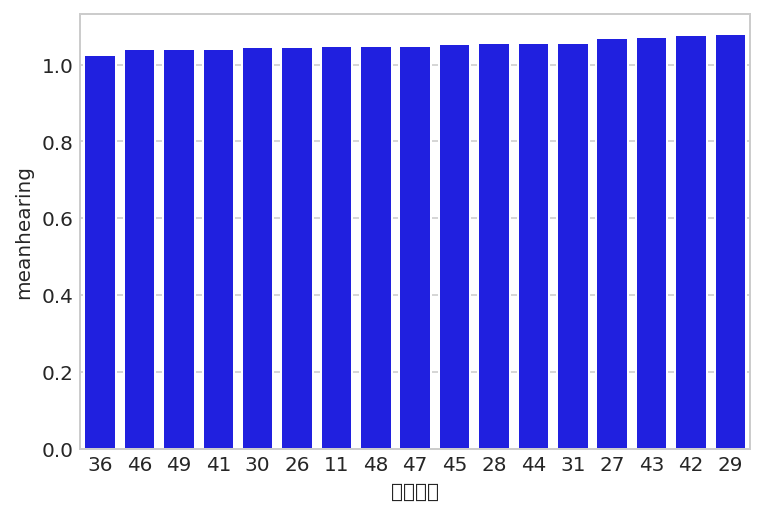

In [ ]:
#대도시와 그렇지 않은 지역 간 소음공해 차이가 실제 청력에 문제를 일으키는지 알아보기 위한 막대그래프
#지역을 그룹으로 묶고 평균 청력을 측정할 수치로 설정
df_region =  health_df.groupby("시도코드", as_index = False).agg( meanhearing = ("청력(좌)", "mean"))
#그래프를 높은것부터 낮은 순으로 그린다
df_region = df_region.sort_values("meanhearing", ascending = True)
sns.barplot(data = df_region, x = "시도코드", y = "meanhearing", color = 'blue')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_te

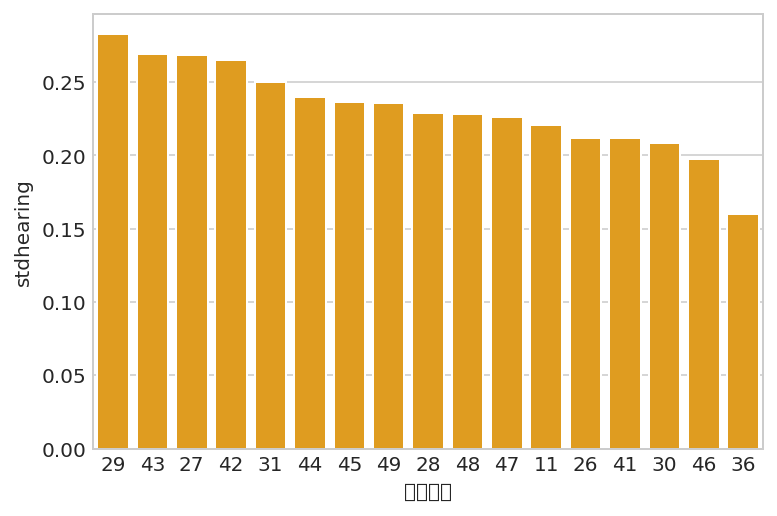

In [ ]:
#평균이 아닌 분산
df_region_1 = health_df.groupby("시도코드", as_index = False).agg( stdhearing = ("청력(좌)", "std"))
df_region_1 = df_region_1.sort_values("stdhearing", ascending = False)
sns.barplot(data = df_region_1, x = "시도코드", y = "stdhearing", color = 'orange')

In [ ]:
#가장 대도시인 서울의 시도코드는 11인데, 청력이 생각했던 것보다 나쁘지 않아 편차가 큰가 예상해보았지만 상관은 없었다.
#청력이 가장 나쁜 도시는 세종특별자치시(36), 전라남도(46), 제주특별자치도(49), 경기도(41), 대전광역시(30)이었다.

### 3. 나이와 혈당의 관계성

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_

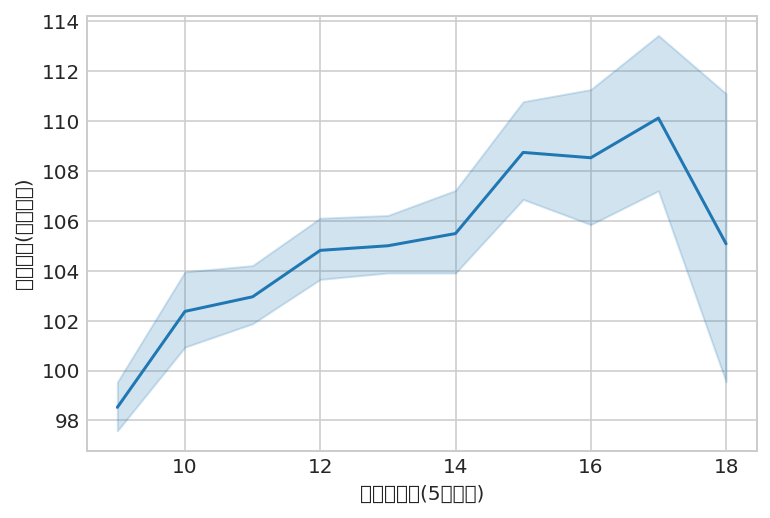

In [39]:
#나이가 많아질수록 혈당이 증가할 것이라고 생각되어 선그래프로 시간이 지남에 따라 변화하는 수치를 나타냈다.
blsugar = health_df.dropna(subset = ["식전혈당(공복혈당)"], axis = 0) #공복혈당 결측치 제거
sns.lineplot(data = blsugar , x = "연령대코드(5세단위)", y = "식전혈당(공복혈당)")

In [ ]:
#예상처럼 나이가 들수록 혈당이 증가하는 추세를 보이나, 80세 이후로는 급격하게 혈당이 떨어진다
#특히 연령대코드 9-10(40-45세), 17-18(80-85세)에서 증가량이 높았다. 

### 4. 지역별 흡연율과 LDL 콜레스테롤

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_te

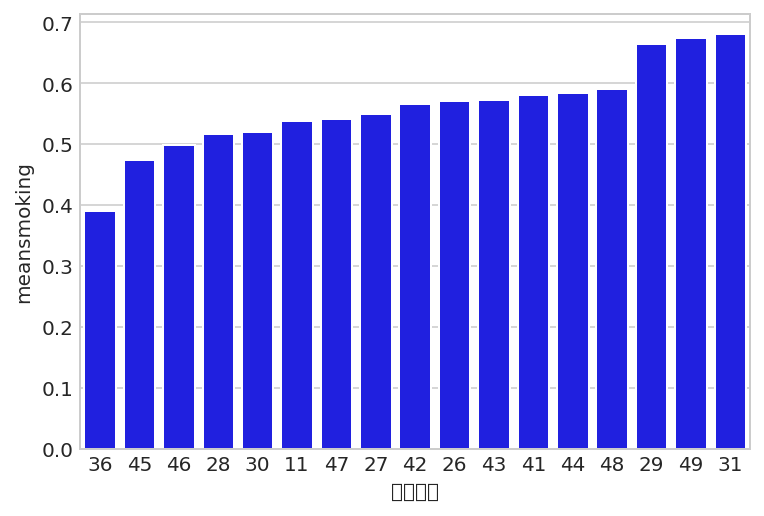

In [ ]:
#어느지역이 가장 흡연을 많이 하는지, 또 흡연율과 나쁜 콜레스테롤 간에 상관관계가 있는지 알아보기 위해
#막대그래프와 산점도를 모두 사용할 것이다

#지역을 그룹으로 묶고 평균 흡연율을 측정할 수치로 설정 (흡연율은 위에서 0,1,2 숫자로 변환한 것을 활용해 평균값을 냈다)
df_region =  health_df.groupby("시도코드", as_index = False).agg( meansmoking = ("흡연상태", "mean"))
#그래프를 높은것부터 낮은 순으로 그린다
df_region = df_region.sort_values("meansmoking", ascending = True)
sns.barplot(data = df_region, x = "시도코드", y = "meansmoking", color = 'blue')

In [ ]:
#다른 지역은 비등비등하나, 유독 세종특별자치시(시도코드 36)가 흡연율이 낮았고,
#광주광역시(29), 제주특별자치도(49), 울산광역시(31)가 높은 흡연율을 보였다.

시도코드
11    0.494935
26    0.498168
27    0.517588
28    0.462963
29    0.611650
30    0.531034
31    0.617021
36    0.366667
41    0.553846
42    0.422764
43    0.563492
44    0.576923
45    0.447368
46    0.543624
47    0.584541
48    0.562738
49    0.591837
Name: 흡연상태, dtype: float64

시도코드
11    116.358900
26    120.597070
27    116.336683
28    123.129630
29    117.106796
30    110.724138
31    112.000000
36    132.833333
41    116.087179
42    111.447154
43    115.357143
44    114.313187
45    115.059211
46    117.402685
47    111.719807
48    114.627376
49    126.265306
Name: LDL콜레스테롤, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_te

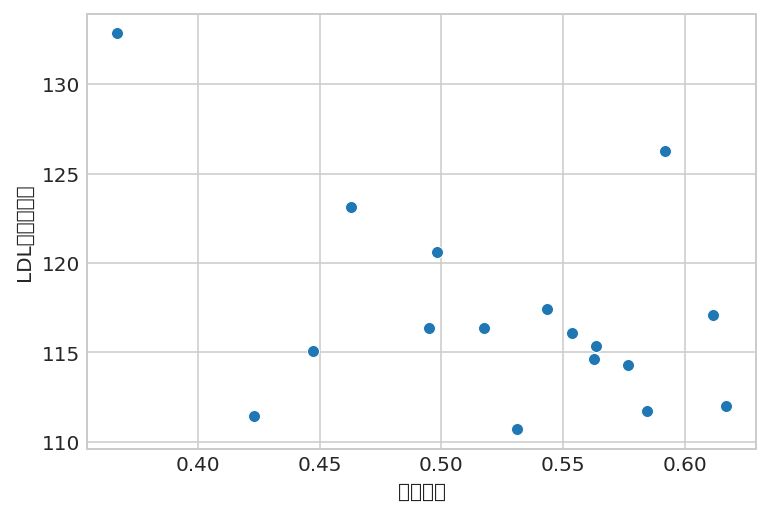

In [42]:
# 지역간 흡연율과 LDL 콜레스테롤 상관관계에 대해 알아보기 위한 산점도 

cholesterol = health_df.dropna(subset = ["LDL콜레스테롤"], axis = 0) #콜레스테롤 결측치 제거
df_meansmoking = cholesterol['흡연상태'].groupby(cholesterol['시도코드']).mean() #지역별 흡연율 평균 = x값
df_meancholesterol = cholesterol['LDL콜레스테롤'].groupby(cholesterol['시도코드']).mean() #지역별 콜레스테롤 평균 = y값

display(df_meansmoking)
display(df_meancholesterol)

sns.scatterplot(data = cholesterol, x = df_meansmoking, y = df_meancholesterol)


In [ ]:
#지역에서 어떤 이유로 흡연을 하는지는 알 수 없었지만, 흡연을 많이 하는 지역에서 콜레스테롤 값이 낮은 편향을 보였다.
#이는 흡연을 하는 사람들이 콜레스테롤도 나쁜 것을 많이 가지고 있을 것이라는 편견과는 정반대의 그래프이다.

# 인사이트

###인사이트1

일상의 편견에 매몰되지 마라

In [ ]:
# 그래프1) LDL 콜레스테롤 & 허리둘레 산점도
#일상의 편견과 실제 데이터가 보여주는 결과가 크게 다르다는 것을 가장 큰 인사이트로 뽑아야할 것 같다.
#콜레스테롤이 높으면 비만일 것이라는 것, 도시에 살면 시력이나 청력이 시골보다 안 좋을 것이라는 것 등
#가설을 세우고 접근했던 것들이 모두 큰 의미를 보이지 않아서 실망하기도 했다.
#물론 이번에 쓰인 자료는 매우 지엽적이고, 더 알고 싶다면 연구가 필요하겠지만 단순히 숫자가 보여주는 결과가
#생각했던 것과 다른 점은 매우 흥미로웠다.

### 인사이트2

내가 원하는 결과가 나왔다고, 원하지 않는 결과가 나왔다고 해서 더 들여다볼 필요 없는 데이터는 없다

In [ ]:
# 어떤 그래프라도 하나도 의미없는 것은 아니었다.

In [ ]:
# 그래프2) 지역별 청력 차이
# 세종시가 다른 지역과 비교했을 때 특별히 낮은 편이었는데, 신도시인만큼 각지에서 와서 편차가 큰 것인지
# 아니면 세종시에 문제가 있는 것인지 찾아볼 필요가 있을 것 같다.

In [ ]:
# 그래프3) 나이와 혈당의 관계성
# 비슷한 증가율로 공복혈당이 증가하는 것이 아니라, 40세-45세, 80세-85세 사이에 급격하게 혈당이 증가한다는 결과에 대해
# 해당 나이대에 혈당에 대해 더 조심해야한다는 인사이트를 얻을 수 있다.
# 80세 이후로는 혈당이 급격히 낮아지는만큼 갑작스러운 저혈당에 대비할 필요가 있다는 점을 시사한다.

### 인사이트3

예상과 다른 데이터는 그 자체로 의미있다

In [ ]:
# 그래프4) 지역별 흡연율과 LDL 콜레스테롤
# 예상과 정반대의 부정 상관관계가 나타났는데, 흡연과 콜레스테롤 감소 사이에 유의미한 상관관계가 있는 것인지
# 아니면 흡연을 하지 않은 사람들이 흡연의 대체제로 콜레스테롤을 높이는 활동을 하는지 추가로 자료를 찾아볼 필요를 느꼈다.
# 조사 결과 흡연은 결국 HDL콜레스테롤을 줄이며 LDL 콜레스테롤을 높인다고 했는데,
# 코딩이 잘못됐을 수도 있지만 왜 이런 모양의 그래프가 나왔는지, 궁금해해야 한다는 점.
# 데이터 자체에 대한 연구도 못지않게 중요하다는 점을 인사이트로 뽑았다.